* Name: `dissipation-theory--Study-13.ipynb`
* Author: John A. Marohn
* Date: 2023-12-14
* Continued from: ---
* Continued to: ---
* Summary: Plot $a_{\mathrm{max}}$ contours in the $(\epsilon^{\prime}_{\mathrm{s}}, \epsilon^{\prime\prime}_{\mathrm{s}})$ plane, keeping in mind that $\epsilon^{\prime\prime}_{\mathrm{s}}$ is negative.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
THIS = 'dissipation-theory--Study-13'

Create a plot of the $a_{\mathrm{max}}$ parameter versus complex dielectric constant.

In [3]:
x = np.linspace(start=1, stop=150, num=200)     # epsilon real
y = np.linspace(start=-1, stop=-80, num=200)   # epsilon imaginary

In [4]:
X, Y = np.meshgrid(x, y)

In [5]:
Z = - Y/np.abs(X + 1 + 1j*Y)**2 + (((X + 1)**2 - Y**2) * np.abs(X + 1j*Y)**2)/(X * np.abs(X + 1 + 1j*Y)**4)

Create contours at the best-fit value, from Virginia's recent data, plus contours at one and three sigma above and below.

In [6]:
aL_3sigma = 0.0119 - 3*0.0014
aL_1sigma = 0.0119 - 0.0014
a0  = 0.0119
aU_1sigma = 0.0119 + 0.0014
aU_3sigma = 0.0119 + 3*0.0014

In [7]:
manual_levels = np.array([aL_3sigma, aL_1sigma, a0, aU_1sigma, aU_3sigma])
manual_levels

array([0.0077, 0.0105, 0.0119, 0.0133, 0.0161])

Make a contour plot of $a_{\mathrm{max}}$ vs $(\epsilon^{\prime}_{\mathrm{s}}, \epsilon^{\prime\prime}_{\mathrm{s}})$.  The default contour label locations are not sensible, so I'm going to have to work on placing them manually.

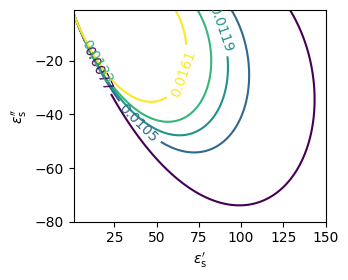

In [24]:
plt.figure(figsize=(3.25, 2.75))

CS = plt.contour(X, Y, Z, levels=manual_levels)
plt.clabel(CS, inline=True, fontsize=10)

plt.xlabel('$\epsilon^{\prime}_{\mathrm{s}}$')
plt.ylabel('$\epsilon^{\prime\prime}_{\mathrm{s}}$')

plt.show()

Following suggestions [here](https://stackoverflow.com/questions/10490302/how-do-you-create-a-legend-for-a-contour-plot), try to add a plot legend indicating the contour values.  The suggestion does not seem to work.

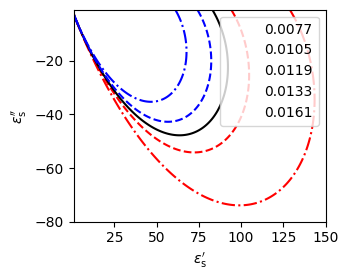

In [25]:
plt.figure(figsize=(3.25, 2.75))

CS = plt.contour(X, Y, Z, 
    levels=manual_levels, 
    linestyles=['dashdot', 'dashed', 'solid', 'dashed', 'dashdot'],
    colors=['r', 'r', 'k', 'b', 'b'])

plt.xlabel('$\epsilon^{\prime}_{\mathrm{s}}$')
plt.ylabel('$\epsilon^{\prime\prime}_{\mathrm{s}}$')

labels=['0.0077', '0.0105', '0.0119', '0.0133', '0.0161']

for i in range(len(labels)):
    CS.collections[i].set_label(labels[i])

plt.legend()

plt.show()

I am going to have to set the location of the contout labels manually.  Read [here](https://stackoverflow.com/questions/2791445/matplotlib-contour-clabel-location) and then play around.

In [10]:
dir(CS.collections[0])

['_A',
 '_PROPERTIES_EXCLUDED_FROM_SET',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_agg_filter',
 '_alias_map',
 '_alpha',
 '_animated',
 '_antialiaseds',
 '_axes',
 '_bcast_lwls',
 '_callbacks',
 '_capstyle',
 '_clipon',
 '_clippath',
 '_cm_set',
 '_default_contains',
 '_edge_default',
 '_edge_is_mapped',
 '_edgecolors',
 '_face_is_mapped',
 '_facecolors',
 '_factor',
 '_fully_clipped_to_axes',
 '_get_default_antialiased',
 '_get_default_edgecolor',
 '_get_default_facecolor',
 '_get_default_linewidth',
 '_gid',
 '_hatch',
 '_hatch_color',
 '_id_norm',
 '_in_layout',
 '_internal_update',
 '_joinstyle',
 '_label',
 '_linestyles',
 '_linewidths',


In [11]:
dir(CS.collections[0].get_paths()[0])

['CLOSEPOLY',
 'CURVE3',
 'CURVE4',
 'LINETO',
 'MOVETO',
 'NUM_VERTICES_FOR_CODE',
 'STOP',
 '__class__',
 '__deepcopy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slotnames__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_codes',
 '_create_closed',
 '_fast_from_codes_and_verts',
 '_interpolation_steps',
 '_readonly',
 '_should_simplify',
 '_simplify_threshold',
 '_unit_circle',
 '_unit_circle_righthalf',
 '_unit_rectangle',
 '_unit_regular_polygons',
 '_unit_regular_stars',
 '_update_values',
 '_vertices',
 'arc',
 'circle',
 'cleaned',
 'clip_to_bbox',
 'code_type',
 'codes',
 'contains_path',
 'contains_point',
 'contains_points',
 'copy',
 'deepcopy',
 'get_extents',
 'hatch',
 'interpolated',
 'i

Playing around, I find that the path vertices are what a I want.  They appear to be a set of $(x,y)$ points that trace out the contour.

In [12]:
path = CS.collections[3].get_paths()[0].vertices
path

array([[ 74.16341475,  -1.        ],
       [ 74.37688442,  -1.22978129],
       [ 74.53383879,  -1.39698492],
       [ 74.89342048,  -1.79396985],
       [ 75.12562814,  -2.0602857 ],
       [ 75.2408479 ,  -2.19095477],
       [ 75.57891996,  -2.5879397 ],
       [ 75.87437186,  -2.94892812],
       [ 75.90418845,  -2.98492462],
       [ 76.22231029,  -3.38190955],
       [ 76.52793457,  -3.77889447],
       [ 76.62311558,  -3.90699749],
       [ 76.82552062,  -4.1758794 ],
       [ 77.11327033,  -4.57286432],
       [ 77.3718593 ,  -4.94403154],
       [ 77.39009314,  -4.96984925],
       [ 77.66095888,  -5.36683417],
       [ 77.92115811,  -5.7638191 ],
       [ 78.12060302,  -6.08032712],
       [ 78.17205433,  -6.16080402],
       [ 78.4167251 ,  -6.55778894],
       [ 78.65159224,  -6.95477387],
       [ 78.86934673,  -7.33828208],
       [ 78.87711604,  -7.35175879],
       [ 79.09748618,  -7.74874372],
       [ 79.30875164,  -8.14572864],
       [ 79.51117329,  -8.54271357],
 

I want the labels to be located at the same $y$ location, say $y = -20$.  So for each contour, I need to find the $x$ value when the contour crosses $y = -20$.  This is tricky because the contour could cross $y = -20$ more than once.  A kluge: Count on the fact that the contours start at large $x$ values.  Step through the $(x,y)$ points until $y$ drops below a target values.  Get the $x$ value there.  

In [13]:
def closest(path, y_target):

    x = path.T[0]
    y = path.T[1]

    for xk, yk in zip(x,y):
        if yk - y_target < 0:
            break

    return(xk, yk)

In [14]:
closest(path,-20)

(82.3460502552852, -20.055276381909547)

Create a list of label-location points by looping over the contours.

In [15]:
manual_locations = []
for i in range(len(manual_levels)):
    path = CS.collections[i].get_paths()[0].vertices
    manual_locations.append(closest(path, -20))

In [16]:
manual_locations

[(140.93300321572704, -20.055276381909547),
 (104.29295913143619, -20.055276381909547),
 (92.13149133857411, -20.055276381909547),
 (82.3460502552852, -20.055276381909547),
 (67.4069541594029, -20.055276381909547)]

Finally, create a nice figure and save it.   See the list of names colors [here](https://matplotlib.org/stable/gallery/color/named_colors.html).

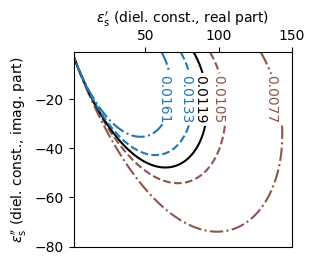

In [29]:
plt.figure(figsize=(3.25, 2.75))

CS = plt.contour(X, Y, Z, 
    levels=manual_levels, 
    linestyles=['dashdot', 'dashed', 'solid', 'dashed', 'dashdot'],
    colors=['tab:brown', 'tab:brown', 'k', 'tab:blue', 'tab:blue'])

labels = plt.clabel(CS, inline=True, fontsize=10, manual=manual_locations)

for label in labels:
    label.set_rotation(-90)
    label.set_horizontalalignment('right')
    
ax = plt.gca()
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.xlabel('$\epsilon^{\prime}_{\mathrm{s}}$ (diel. const., real part)')
plt.ylabel('$\epsilon^{\prime\prime}_{\mathrm{s}}$ (diel. const., imag. part)')

plt.tight_layout()

plt.savefig(THIS + '--Fig-1.png', dpi=300)
plt.savefig(THIS + '--Fig-1.pdf')

plt.show()

Just for fun, use logarithmic axes.  To do this requires flipping the sign of the $y$ axis, so it is positive.  Don't worry about getting the contour labels correct in this plot.

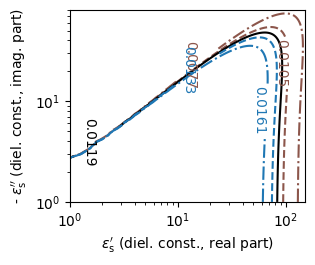

In [37]:
plt.figure(figsize=(3.25, 2.75))

CS = plt.contour(X, -Y, Z, 
    levels=manual_levels, 
    linestyles=['dashdot', 'dashed', 'solid', 'dashed', 'dashdot'],
    colors=['tab:brown', 'tab:brown', 'k', 'tab:blue', 'tab:blue'])

plt.yscale('log')
plt.xscale('log')

labels = plt.clabel(CS, inline=True, fontsize=10)

for label in labels:
    label.set_rotation(-90)
    label.set_horizontalalignment('right')
    
plt.xlabel('$\epsilon^{\prime}_{\mathrm{s}}$ (diel. const., real part)')
plt.ylabel('- $\epsilon^{\prime\prime}_{\mathrm{s}}$ (diel. const., imag. part)')

plt.tight_layout()

plt.savefig(THIS + '--Fig-2.png', dpi=300)
plt.savefig(THIS + '--Fig-2.pdf')

plt.show()